In [1]:
import librosa
import efeitos
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

### Original

In [2]:
sinalOriginal, freqAmostragem = librosa.core.load("/home/dimi/Programming/MachineLearningUFABC/Projeto_Final/lars_maynard.wav", mono=True, sr=None)
sinalOriginal = sinalOriginal[:int(0.5*len(sinalOriginal))]
Audio(data=sinalOriginal, rate=freqAmostragem)

### Normalizado pela energia

In [3]:
print("Energia antes:", np.var(sinalOriginal))
sinalOriginal = efeitos.normalizarEnergia(sinalOriginal)
print("Energia depois:", np.var(sinalOriginal))
Audio(data=sinalOriginal, rate=freqAmostragem)

Energia antes: 0.016934952
Energia depois: 1.0000001


### Deslocamento temporal

In [4]:
sinalTempo, __ = efeitos.deslocarTempoAleatoriamente(sinalOriginal)
Audio(data=sinalTempo, rate=freqAmostragem)

### Alteração de pitch

In [5]:
sinalPitch, __ = efeitos.mudarPitchAleatoriamente(sinalOriginal, freqAmostragem)
Audio(data=sinalPitch, rate=freqAmostragem)

### Adição de ruído branco

In [6]:
sinalRuido, __ = efeitos.adicionarRuidoBrancoAleatoriamente(sinalOriginal)
Audio(data=sinalRuido, rate=freqAmostragem)

### Alteração na velocidade de reprodução

In [7]:
sinalVelocidade, __ = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
Audio(data=sinalVelocidade, rate=freqAmostragem)

## Observando as distribuições de probabilidade

In [8]:
arrayPitchs        = []
arraySNRs          = []
arrayVelocidades   = []
arrayDeslocamentos = []

iteracoes = 1000
for i in range(1, iteracoes+1):
    
    __, valocidadeAtual   = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
    __, snrAtual          = efeitos.adicionarRuidoBrancoAleatoriamente(sinalOriginal)
    __, pitchAtual        = efeitos.mudarPitchAleatoriamente(sinalOriginal, freqAmostragem)
    __, deslocamentoAtual = efeitos.deslocarTempoAleatoriamente(sinalOriginal)
    
    arrayPitchs.append(pitchAtual)
    arraySNRs.append(snrAtual)
    arrayVelocidades.append(valocidadeAtual)
    arrayDeslocamentos.append(deslocamentoAtual)
    
    print(str(100*i/iteracoes) + "%", end =" ")    

0.1% 0.2% 0.3% 0.4% 0.5% 0.6% 0.7% 0.8% 0.9% 1.0% 1.1% 1.2% 1.3% 1.4% 1.5% 1.6% 1.7% 1.8% 1.9% 2.0% 2.1% 2.2% 2.3% 2.4% 2.5% 2.6% 2.7% 2.8% 2.9% 3.0% 3.1% 3.2% 3.3% 3.4% 3.5% 3.6% 3.7% 3.8% 3.9% 4.0% 4.1% 4.2% 4.3% 4.4% 4.5% 4.6% 4.7% 4.8% 4.9% 5.0% 5.1% 5.2% 5.3% 5.4% 5.5% 5.6% 5.7% 5.8% 5.9% 6.0% 6.1% 6.2% 6.3% 6.4% 6.5% 6.6% 6.7% 6.8% 6.9% 7.0% 7.1% 7.2% 7.3% 7.4% 7.5% 7.6% 7.7% 7.8% 7.9% 8.0% 8.1% 8.2% 8.3% 8.4% 8.5% 8.6% 8.7% 8.8% 8.9% 9.0% 9.1% 9.2% 9.3% 9.4% 9.5% 9.6% 9.7% 9.8% 9.9% 10.0% 10.1% 10.2% 10.3% 10.4% 10.5% 10.6% 10.7% 10.8% 10.9% 11.0% 11.1% 11.2% 11.3% 11.4% 11.5% 11.6% 11.7% 11.8% 11.9% 12.0% 12.1% 12.2% 12.3% 12.4% 12.5% 12.6% 12.7% 12.8% 12.9% 13.0% 13.1% 13.2% 13.3% 13.4% 13.5% 13.6% 13.7% 13.8% 13.9% 14.0% 14.1% 14.2% 14.3% 14.4% 14.5% 14.6% 14.7% 14.8% 14.9% 15.0% 15.1% 15.2% 15.3% 15.4% 15.5% 15.6% 15.7% 15.8% 15.9% 16.0% 16.1% 16.2% 16.3% 16.4% 16.5% 16.6% 16.7% 16.8% 16.9% 17.0% 17.1% 17.2% 17.3% 17.4% 17.5% 17.6% 17.7% 17.8% 17.9% 18.0% 18.1% 18.2% 18.3% 1

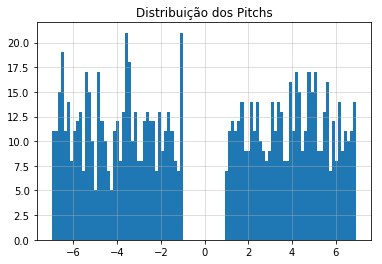

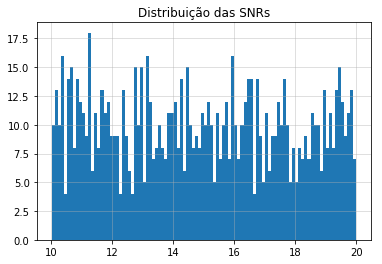

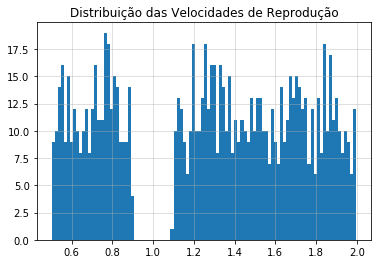

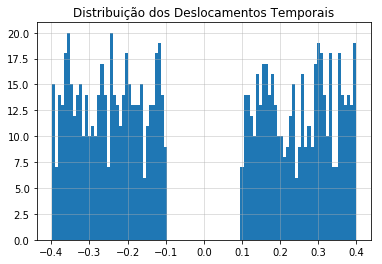

In [9]:
plt.hist(arrayPitchs, bins=100)
plt.title("Distribuição dos Pitchs")
plt.grid(alpha=0.5)
plt.show()

plt.hist(arraySNRs, bins=100)
plt.title("Distribuição das SNRs")
plt.grid(alpha=0.5)
plt.show()

plt.hist(arrayVelocidades, bins=100)
plt.title("Distribuição das Velocidades de Reprodução")
plt.grid(alpha=0.5)
plt.show()

plt.hist(arrayDeslocamentos, bins=100)
plt.title("Distribuição dos Deslocamentos Temporais")
plt.grid(alpha=0.5)
plt.show()